In [1]:
# 1. Import Libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
# 2. Load and Preprocess CIFAR-10 Dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

170498071/170498071 [==============================] - 7s 0us/step


In [3]:
# 3. Build the LeNet Model
model = models.Sequential()


In [4]:
# Layer 1: Convolutional Layer
model.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.AveragePooling2D())

# Layer 2: Convolutional Layer
model.add(layers.Conv2D(16, (5, 5), activation='relu'))
model.add(layers.AveragePooling2D())

# Layer 3: Flatten the layers
model.add(layers.Flatten())

# Layer 4: Fully Connected Layer
model.add(layers.Dense(120, activation='relu'))

# Layer 5: Fully Connected Layer
model.add(layers.Dense(84, activation='relu'))

# Layer 6: Fully Connected Layer with Softmax Activation
model.add(layers.Dense(10, activation='softmax'))

In [5]:
# 4. Compile the Model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [6]:
# 5. Train the Model
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 41s 25ms/step - loss: 1.6936 - accuracy: 0.3853 - val_loss: 1.5035 - val_accuracy: 0.4581
Epoch 2/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.4194 - accuracy: 0.4920 - val_loss: 1.3754 - val_accuracy: 0.5047
Epoch 3/10
1563/1563 [==============================] - 40s 25ms/step - loss: 1.3183 - accuracy: 0.5301 - val_loss: 1.3209 - val_accuracy: 0.5357
Epoch 4/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.2405 - accuracy: 0.5582 - val_loss: 1.3018 - val_accuracy: 0.5346
Epoch 5/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.1813 - accuracy: 0.5821 - val_loss: 1.2172 - val_accuracy: 0.5662
Epoch 6/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.1281 - accuracy: 0.6014 - val_loss: 1.2242 - val_accuracy: 0.5667
Epoch 7/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.0833 - accuracy: 0.6171 - val_loss: 1.2148 -

313/313 - 3s - loss: 1.1729 - accuracy: 0.5880 - 3s/epoch - 8ms/step
0.5879999995231628


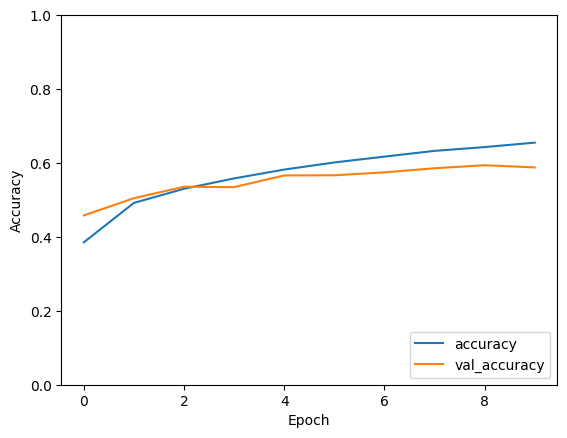

In [7]:
# 6. Evaluate the Model and Plot the Results
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(test_acc)
